# **Problem Description:**

Recognizing multi-digit numbers in photographs captured at street level is an 
important component of modern-day map making. A classic example of a corpus of such street level photographs is Google’s Street View imagery  comprised of hundreds of millions of geo-located 360 degree panoramic images. The ability to automatically transcribe an address number from a geolocated patch of pixels and associate the transcribed number with a known street address helps pinpoint, with a high degree of accuracy, the location of the building it represents.

More broadly, recognizing numbers in photographs is a problem of interest to 
the optical character recognition community. While OCR on constrained 
domains like document processing is well studied, arbitrary multi-character text recognition in photographs is still highly challenging. This difficulty arises due to  the wide variability in the visual appearance of text in the wild on account of a large range of fonts, colours, styles, orientations, and character arrangements. 

The recognition problem is further complicated by environmental factors such 
as lighting, shadows, secularities, and occlusions as well as by image acquisition factors such as resolution, motion, and focus blurs.
In this project we will use dataset with images centred around a single digit 
(many of the images do contain some distractors at the sides). Although we are 
taking a sample of the data which is simpler, it is more complex than MNIST 
because of the distractors.

**Data Description:**

The Street View House Numbers (SVHN) Dataset
SVHN is a real-world image dataset for developing machine learning and object
recognition algorithms with minimal requirement on data formatting but comes 
from a significantly harder, unsolved, real world problem (recognizing digits and  numbers in natural scene images). SVHN is obtained from house numbers in 
Google Street View images.

**Objective:**

The objective of the project is to learn how to implement a simple image 
classification pipeline based on a deep neural network. The goals of this project  are as follows:

1.  Load Dataset

2.  Understand the basic Image Classification pipeline and the data-driven 
approach (train/predict stages)

3.  Data fetching and understand the train/val/test splits.

4.  Implement and apply a deep neural network classifier including (feedforward neural network, RELU, activations)

5.  Implement batch normalization for training the neural network 

6.  Print the classification accuracy metrics 

# **(1) Load the dataset**

In [0]:
from google.colab import drive

In [0]:
#drive.mount('/content/drive')

In [0]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

The h5py package is a Pythonic interface to the HDF5 binary data format.

*   H5py provides easy-to-use high level interface, which allows to store huge amounts of numerical data. 
*   Easily manipulate that data from NumPy.
*   H5py uses straightforward NumPy and Python metaphors, like dictionary and 
NumPy array syntax.


In [0]:
import h5py

In [83]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.2.0-rc2


In [0]:
data=h5py.File('/content/drive/My Drive/Module8-Intro_NN_DL/Project_Intro_NN_DL/SVHN_single_grey1.h5','r')

In [85]:
data.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

From the above we can see that we have in dataset all train,validation and test data are available

# **(2)Understand the basic Image Classification pipeline and the data-driven approach (train/predict stages)**

Image Classification pipeline  follws the following below steps

# **(3)Data fetching and understand the train/val/test splits.**

**Exploring the data**

In [0]:
X_train1=data['X_train'][:]
y_train1=data['y_train'][:]
X_test1=data['X_test'][:]
y_test1=data['y_test'][:]
X_val1=data['X_val'][:]
y_val1=data['y_val'][:]

In [87]:
print('Training set shape:',X_train1.shape)
print('Test set shape:',X_test1.shape)
print('Validation set shape:',X_val1.shape)
print('Training labels shape:',y_train1.shape)
print('Test labels shape:',y_test1.shape)
print('Validation labels shape:',y_val1.shape)

Training set shape: (42000, 32, 32)
Test set shape: (18000, 32, 32)
Validation set shape: (60000, 32, 32)
Training labels shape: (42000,)
Test labels shape: (18000,)
Validation labels shape: (60000,)


Lets see the first image in training set

In [88]:
X_train1[0]

array([[ 33.0704,  30.2601,  26.852 , ...,  71.4471,  58.2204,  42.9939],
       [ 25.2283,  25.5533,  29.9765, ..., 113.0209, 103.3639,  84.2949],
       [ 26.2775,  22.6137,  40.4763, ..., 113.3028, 121.775 , 115.4228],
       ...,
       [ 28.5502,  36.212 ,  45.0801, ...,  24.1359,  25.0927,  26.0603],
       [ 38.4352,  26.4733,  23.2717, ...,  28.1094,  29.4683,  30.0661],
       [ 50.2984,  26.0773,  24.0389, ...,  49.6682,  50.853 ,  53.0377]],
      dtype=float32)

In [89]:
print(X_train1.max())
print(X_train1.min())

254.9745
0.0


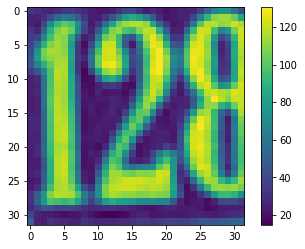

In [90]:
plt.figure()
plt.imshow(X_train1[0])
plt.colorbar()   #this display a bar of pixel intensity here
plt.grid(False)
plt.show()


From the above we can observe that we have total 42000  training images.The images are 32x32 NumPy arrays, with pixel values ranging from 0 to 255

Now lets see what train labels contain

In [91]:
y_train1

array([2, 6, 7, ..., 7, 0, 4], dtype=uint8)

so from the above we can observe that train labels range from 0 to 9

**Preprocess the data:**

The data must be preprocessed before training the network.Now we will scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, we divide the values by 255. It's important that the training set and the testing set be preprocessed in the same way:

In [0]:
X_train2 = X_train1/255
X_test2 = X_test1/255
X_val2 = X_val1/255

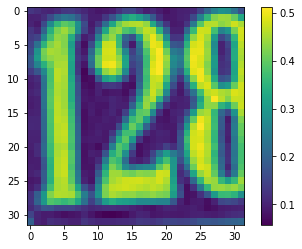

In [93]:
plt.figure()
plt.imshow(X_train2[0])
plt.colorbar()   #this display a bar of pixel intensity here
plt.grid(False)
plt.show()

We can clearly see from above by scaling pixel size in the range of 0 to 1

To verify that the data is in the correct format and that we are ready to build and train the network, let's display the first 25 images from the training set and display the class labels below each image.

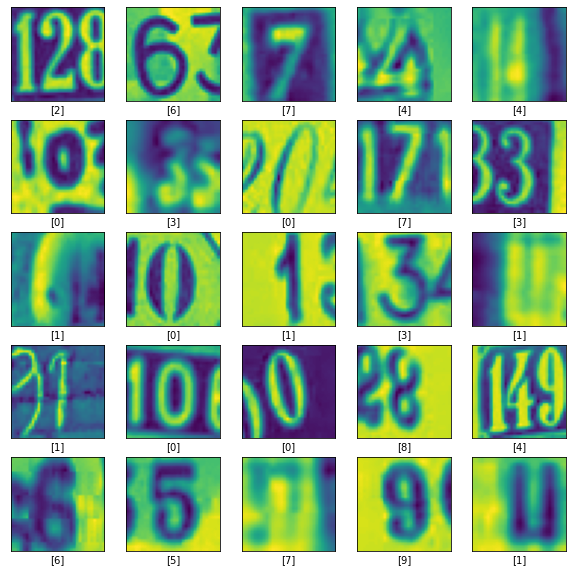

In [94]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    #plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.imshow(X_train2[i])
    #plt.xlabel(class_names[y_train[i]])
    plt.xlabel([y_train1[i]])  #this display the class label corresponding to train data
plt.show()

From the above figure we can clearly see that image have multiple digits and digits present in the middle of each image is our intrest.We can see corresponding labels given for each image.

**Reshaping /Flattening the input image**


In [0]:
# reshaping X data: (n, 32, 32) => (n, 1024)
train_X = X_train2.reshape((X_train2.shape[0], -1))
test_X = X_test2.reshape((X_test2.shape[0], -1))
val_X = X_val2.reshape((X_val2.shape[0], -1))

In [96]:
train_X[0]

array([0.12968785, 0.11866706, 0.10530196, ..., 0.19477727, 0.19942354,
       0.20799099], dtype=float32)

In [97]:
len(train_X[0])

1024

In [98]:
train_X.shape

(42000, 1024)

**One-hot encoding of train,test and validation labels**


In [0]:
from keras.utils.np_utils import to_categorical
train_y = to_categorical(y_train1)
test_y = to_categorical(y_test1)
val_y = to_categorical(y_val1)

Lets see how some of the training labels after one hot encoding

In [100]:
train_y[0:5]

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [101]:
print(train_X.shape, test_X.shape,val_X.shape, train_y.shape, test_y.shape, val_y.shape)

(42000, 1024) (18000, 1024) (60000, 1024) (42000, 10) (18000, 10) (60000, 10)


Now we are good to go for building neural network

# **(4)Implement and apply a deep neural network classifier including (feedforward neural network, RELU, activations)**

**Building the model:**

Building the neural network requires configuring the layers of the model, then compiling the model.

**Setting up the layers:**
The basic building block of a neural network is the layer. Layers extract representations from the data fed into them. 

Most of deep learning consists of chaining together simple layers. Most layers, such as tf.keras.layers.Dense, have parameters that are learned during training.

In [0]:
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras import optimizers
from keras.layers import Flatten

# (i)Optimizer SGD

In [0]:
model_1 = Sequential()

In [0]:
model_1.add(Dense(256, input_shape = (1024, )))
model_1.add(Activation('relu'))
model_1.add(Dense(128))
model_1.add(Activation('relu'))
model_1.add(Dense(64))
model_1.add(Activation('relu'))
model_1.add(Dense(32))
model_1.add(Activation('relu'))
model_1.add(Dense(10))
model_1.add(Activation('softmax'))



 The network consists of a input layer,3 hidden layers and one output layer. These are densely connected, or fully connected, neural layers. The first `Dense` hidden layer has 128 nodes (or neurons). The last layer returns a logits array with length of 10. Each node contains a score that indicates the current image belongs to one of the 10 classes.

### Compiling the model

Before the model is ready for training, it needs a few more settings. These are added during the model's *compile* step:

* *Loss function* —This measures how accurate the model is during training. We want to minimize this function to "steer" the model in the right direction.
* *Optimizer* —This is how the model is updated based on the data it sees and its loss function.
* *Metrics* —Used to monitor the training and testing steps. The following example uses *accuracy*, the fraction of the images that are correctly classified.

In [0]:
sgd = optimizers.SGD(lr = 0.001)
model_1.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [106]:
model_1.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 256)               262400    
_________________________________________________________________
activation_26 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 128)               32896     
_________________________________________________________________
activation_27 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 64)                8256      
_________________________________________________________________
activation_28 (Activation)   (None, 64)                0         
_________________________________________________________________
dense_29 (Dense)             (None, 32)               

## Train the model

Training the neural network model requires the following steps:

1. Feed the training data to the model. In this example, the training data is in the `train_X` and `train_y` arrays.
2. The model learns to associate images and labels.
3. Now we ask the model to make predictions about a test set—in this example, the `test_X` array.
4. Verify that the predictions match the labels from the `test_y` array.

### Feed the model

To start training, we call the `model.fit` method—so called because it "fits" the model to the training data:

In [107]:
history_1 = model_1.fit(train_X, train_y,validation_data=(val_X, val_y), batch_size = 32, epochs = 20, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/20
42000/42000 [==============================] - 7s 157us/step - loss: 2.3024 - accuracy: 0.1142 - val_loss: 2.2958 - val_accuracy: 0.1305
Epoch 2/20
42000/42000 [==============================] - 7s 157us/step - loss: 2.2939 - accuracy: 0.1410 - val_loss: 2.2910 - val_accuracy: 0.1552
Epoch 3/20
42000/42000 [==============================] - 7s 156us/step - loss: 2.2890 - accuracy: 0.1583 - val_loss: 2.2860 - val_accuracy: 0.1654
Epoch 4/20
42000/42000 [==============================] - 7s 155us/step - loss: 2.2838 - accuracy: 0.1710 - val_loss: 2.2810 - val_accuracy: 0.1671
Epoch 5/20
42000/42000 [==============================] - 6s 155us/step - loss: 2.2779 - accuracy: 0.1855 - val_loss: 2.2740 - val_accuracy: 0.1937
Epoch 6/20
42000/42000 [==============================] - 7s 155us/step - loss: 2.2709 - accuracy: 0.2032 - val_loss: 2.2663 - val_accuracy: 0.2131
Epoch 7/20
42000/42000 [==============================] - 7s 1

### Evaluate accuracy

Next, we compare how the model performs on the test dataset:

In [108]:
results_1= model_1.evaluate(test_X, test_y)
print('Test loss: ', results_1[0])
print('Test accuracy: ', results_1[1])

18000/18000 [==============================] - 1s 49us/step
Test loss:  1.731913706143697
Test accuracy:  0.4259999990463257


Now we will save the accuracy result in a dataframe so that we can compare different models

In [109]:
#Storing the accuracy results for each model in a dataframe for final comparison
import pandas as pd
results_on_test = pd.DataFrame({'Model_with':['SGD'],'Loss':results_1[0], 'Accuracy': results_1[1]},index={'1'})
#results_on_test = results_on_test[['Method','Loss' ,'Accuracy']]
results_on_test

,Model_with,Loss,Accuracy
1,SGD,1.731914,0.426


# (ii)Optimizer SGD +Weight Initialization

Changing weight initialization scheme can significantly improve training of the 
model by preventing vanishing gradient problem up to some degree



In [0]:
model_2 = Sequential()

In [0]:
model_2.add(Dense(256, input_shape = (1024, ), kernel_initializer='he_normal'))    
model_2.add(Activation('relu'))       
model_2.add(Dense(128, kernel_initializer='he_normal'))                           
model_2.add(Activation('relu'))    
model_2.add(Dense(64, kernel_initializer='he_normal'))                           
model_2.add(Activation('relu'))  
model_2.add(Dense(32,kernel_initializer='he_normal'))
model_2.add(Activation('relu'))  
model_2.add(Dense(10, kernel_initializer='he_normal'))                           
model_2.add(Activation('softmax'))

In [0]:
sgd = optimizers.SGD(lr = 0.001)
model_2.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])   

In [113]:
history_2 = model_2.fit(train_X, train_y,validation_data=(val_X, val_y), batch_size = 32, epochs = 20, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/20
42000/42000 [==============================] - 6s 151us/step - loss: 2.2980 - accuracy: 0.1222 - val_loss: 2.2839 - val_accuracy: 0.1456
Epoch 2/20
42000/42000 [==============================] - 6s 150us/step - loss: 2.2740 - accuracy: 0.1673 - val_loss: 2.2627 - val_accuracy: 0.1766
Epoch 3/20
42000/42000 [==============================] - 7s 158us/step - loss: 2.2471 - accuracy: 0.2037 - val_loss: 2.2302 - val_accuracy: 0.2359
Epoch 4/20
42000/42000 [==============================] - 7s 157us/step - loss: 2.2123 - accuracy: 0.2413 - val_loss: 2.1911 - val_accuracy: 0.2613
Epoch 5/20
42000/42000 [==============================] - 7s 166us/step - loss: 2.1676 - accuracy: 0.2684 - val_loss: 2.1417 - val_accuracy: 0.2875
Epoch 6/20
42000/42000 [==============================] - 6s 154us/step - loss: 2.1136 - accuracy: 0.2928 - val_loss: 2.0846 - val_accuracy: 0.3088
Epoch 7/20
42000/42000 [==============================] - 7s 1

In [114]:
results_2= model_2.evaluate(test_X, test_y)
print('Test loss: ', results_2[0])
print('Test accuracy: ', results_2[1])


18000/18000 [==============================] - 1s 49us/step
Test loss:  1.2847462093565198
Test accuracy:  0.6156666874885559


In [115]:
#Store the accuracy results for each model in a dataframe for final comparison
temp_df=pd.DataFrame({'Model_with':['SGD+Weight_Initialization'],'Loss':results_2[0], 'Accuracy': results_2[1]},index={'2'})
results_on_test =results_on_test.append(temp_df)
results_on_test

,Model_with,Loss,Accuracy
1,SGD,1.731914,0.426000
2,SGD+Weight_Initialization,1.284746,0.615667


# (iii)Optimizer ADAM + Weight Initialization

In [0]:
model_3 = Sequential()

In [0]:
model_3.add(Dense(256, input_shape = (1024, ), kernel_initializer='he_normal'))     # use he_normal initializer
model_3.add(Activation('relu'))      
model_3.add(Dense(128, kernel_initializer='he_normal'))                            # use he_normal initializer
model_3.add(Activation('relu'))    
model_3.add(Dense(64, kernel_initializer='he_normal'))                            # use he_normal initializer
model_3.add(Activation('relu'))  
model_3.add(Dense(32, kernel_initializer='he_normal'))
model_3.add(Activation('relu'))  
model_3.add(Dense(10, kernel_initializer='he_normal'))                            # use he_normal initializer
model_3.add(Activation('softmax'))


In [0]:
adam = optimizers.Adam(lr = 0.001)
model_3.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [119]:
history_3 = model_3.fit(train_X, train_y,validation_data=(val_X, val_y), batch_size = 32, epochs = 20, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/20
42000/42000 [==============================] - 8s 180us/step - loss: 2.2786 - accuracy: 0.1177 - val_loss: 2.1083 - val_accuracy: 0.1890
Epoch 2/20
42000/42000 [==============================] - 7s 174us/step - loss: 1.7147 - accuracy: 0.3876 - val_loss: 1.4289 - val_accuracy: 0.5135
Epoch 3/20
42000/42000 [==============================] - 7s 176us/step - loss: 1.3351 - accuracy: 0.5568 - val_loss: 1.2342 - val_accuracy: 0.5967
Epoch 4/20
42000/42000 [==============================] - 7s 173us/step - loss: 1.1963 - accuracy: 0.6134 - val_loss: 1.1605 - val_accuracy: 0.6250
Epoch 5/20
42000/42000 [==============================] - 7s 175us/step - loss: 1.1118 - accuracy: 0.6436 - val_loss: 1.2000 - val_accuracy: 0.6060
Epoch 6/20
42000/42000 [==============================] - 7s 171us/step - loss: 1.0499 - accuracy: 0.6664 - val_loss: 0.9868 - val_accuracy: 0.6890
Epoch 7/20
42000/42000 [==============================] - 7s 1

In [120]:
results_3= model_3.evaluate(test_X, test_y)
print('Test loss: ', results_3[0])
print('Test accuracy: ', results_3[1])

18000/18000 [==============================] - 1s 47us/step
Test loss:  0.832286527633667
Test accuracy:  0.7449444532394409


In [121]:
#Store the accuracy results for each model in a dataframe for final comparison
temp_df=pd.DataFrame({'Model_with':['ADAM +weight_initialisation'],'Loss':results_3[0], 'Accuracy': results_3[1]},index={'3'})
results_on_test =results_on_test.append(temp_df)
results_on_test

,Model_with,Loss,Accuracy
1,SGD,1.731914,0.426000
2,SGD+Weight_Initialization,1.284746,0.615667
3,ADAM +weight_initialisation,0.832287,0.744944


# **(5)Implement batch normalization for training the neural network**

# (iv) Optimizer ADAM + Batch Normalization
Batch Normalization, one of the methods to prevent the "internal covariance shift" problem, has proven to be highly effective.

We normalize each mini-batch before nonlinearity.Batch normalization layer is usually inserted after dense/convolution and before nonlinearity


In [0]:
from keras.layers import BatchNormalization, Dropout


In [0]:
model_4 = Sequential()

In [0]:
model_4.add(Dense(256, input_shape = (1024, )))
model_4.add(BatchNormalization())                    
model_4.add(Activation('relu'))       
model_4.add(Dense(128))
model_4.add(BatchNormalization())                    
model_4.add(Activation('relu'))    
model_4.add(Dense(64))
model_4.add(BatchNormalization())                    
model_4.add(Activation('relu'))
model_4.add(Dense(32))
model_4.add(BatchNormalization())                    
model_4.add(Activation('relu'))    
model_4.add(Dense(10))
model_4.add(Activation('softmax'))

In [0]:
adam = optimizers.Adam(lr = 0.001)
model_4.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [126]:
history_4 = model_4.fit(train_X, train_y,validation_data=(val_X, val_y), batch_size = 32, epochs = 20, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/20
42000/42000 [==============================] - 13s 319us/step - loss: 1.4873 - accuracy: 0.5058 - val_loss: 2.1820 - val_accuracy: 0.3193
Epoch 2/20
42000/42000 [==============================] - 13s 310us/step - loss: 1.0571 - accuracy: 0.6627 - val_loss: 1.1896 - val_accuracy: 0.6129
Epoch 3/20
42000/42000 [==============================] - 13s 312us/step - loss: 0.9163 - accuracy: 0.7090 - val_loss: 1.4191 - val_accuracy: 0.5513
Epoch 4/20
42000/42000 [==============================] - 13s 313us/step - loss: 0.8467 - accuracy: 0.7302 - val_loss: 1.2630 - val_accuracy: 0.5826
Epoch 5/20
42000/42000 [==============================] - 13s 311us/step - loss: 0.7720 - accuracy: 0.7535 - val_loss: 1.1653 - val_accuracy: 0.6198
Epoch 6/20
42000/42000 [==============================] - 13s 308us/step - loss: 0.7325 - accuracy: 0.7677 - val_loss: 1.0346 - val_accuracy: 0.6604
Epoch 7/20
42000/42000 [==============================] 

In [127]:
results_4= model_4.evaluate(test_X, test_y)
print('Test loss: ', results_4[0])
print('Test accuracy: ', results_4[1])

18000/18000 [==============================] - 1s 71us/step
Test loss:  0.6899001955721114
Test accuracy:  0.7928333282470703


In [128]:
#Store the accuracy results for each model in a dataframe for final comparison
temp_df=pd.DataFrame({'Model_with':['ADAM + Batch_Normalization'],'Loss':results_4[0], 'Accuracy': results_4[1]},index={'4'})
results_on_test =results_on_test.append(temp_df)
results_on_test

,Model_with,Loss,Accuracy
1,SGD,1.731914,0.426000
2,SGD+Weight_Initialization,1.284746,0.615667
3,ADAM +weight_initialisation,0.832287,0.744944
4,ADAM + Batch_Normalization,0.689900,0.792833


# (v)Optimizer ADAM + Batch Normalization + Weight Initialization +Dropout

In [0]:
model_5 = Sequential()

In [0]:
model_5.add(Dense(256, input_shape = (1024, ), kernel_initializer='he_normal'))
model_5.add(BatchNormalization())
model_5.add(Activation('relu'))
model_5.add(Dropout(0.2))
model_5.add(Dense(128, kernel_initializer='he_normal'))
model_5.add(BatchNormalization())
model_5.add(Activation('relu'))
model_5.add(Dropout(0.2))
model_5.add(Dense(64, kernel_initializer='he_normal'))
model_5.add(BatchNormalization())
model_5.add(Activation('relu'))
model_5.add(Dropout(0.2))
model_5.add(Dense(32, kernel_initializer='he_normal'))
model_5.add(BatchNormalization())
model_5.add(Activation('relu'))
model_5.add(Dropout(0.2))
model_5.add(Dense(10, kernel_initializer='he_normal'))
model_5.add(Activation('softmax'))


In [0]:
adam = optimizers.Adam(lr = 0.001)
model_5.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [132]:
history_5 = model_5.fit(train_X, train_y,batch_size=32, validation_data=(val_X, val_y),epochs = 20, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/20
42000/42000 [==============================] - 14s 338us/step - loss: 2.0568 - accuracy: 0.2642 - val_loss: 1.6531 - val_accuracy: 0.4337
Epoch 2/20
42000/42000 [==============================] - 13s 320us/step - loss: 1.5166 - accuracy: 0.4902 - val_loss: 1.4944 - val_accuracy: 0.4946
Epoch 3/20
42000/42000 [==============================] - 14s 323us/step - loss: 1.3332 - accuracy: 0.5715 - val_loss: 1.2282 - val_accuracy: 0.6262
Epoch 4/20
42000/42000 [==============================] - 13s 321us/step - loss: 1.2152 - accuracy: 0.6131 - val_loss: 1.3435 - val_accuracy: 0.5490
Epoch 5/20
42000/42000 [==============================] - 13s 320us/step - loss: 1.1578 - accuracy: 0.6374 - val_loss: 1.0644 - val_accuracy: 0.6708
Epoch 6/20
42000/42000 [==============================] - 14s 324us/step - loss: 1.0874 - accuracy: 0.6589 - val_loss: 0.8902 - val_accuracy: 0.7318
Epoch 7/20
42000/42000 [==============================] 

In [133]:
results_5 = model_5.evaluate(test_X, test_y)
print('Test loss: ', results_5[0])
print('Test accuracy: ', results_5[1])

18000/18000 [==============================] - 1s 75us/step
Test loss:  0.7987971320152283
Test accuracy:  0.75


In [134]:
#Store the accuracy results for each model in a dataframe for final comparison
temp_df=pd.DataFrame({'Model_with':['ADAM+Batch_Normalization+Weight_Initialization+Dropout'],'Loss':results_5[0], 'Accuracy': results_5[1]},index={'5'})
results_on_test =results_on_test.append(temp_df)
results_on_test

,Model_with,Loss,Accuracy
1,SGD,1.731914,0.426000
2,SGD+Weight_Initialization,1.284746,0.615667
3,ADAM +weight_initialisation,0.832287,0.744944
4,ADAM + Batch_Normalization,0.689900,0.792833
5,ADAM+Batch_Normalization+Weight_Initialization...,0.798797,0.750000


# (vi)Optimiser ADAM + Batch_Normalization + Weight_Initialization+Dropout+Large_Epoch

In [0]:
model_6 = Sequential()

In [0]:
model_6.add(Dense(256, input_shape = (1024, ), kernel_initializer='he_normal'))
model_6.add(BatchNormalization())
model_6.add(Activation('relu'))
model_6.add(Dropout(0.2))
model_6.add(Dense(128, kernel_initializer='he_normal'))
model_6.add(BatchNormalization())
model_6.add(Activation('relu'))
model_6.add(Dropout(0.2))
model_6.add(Dense(64, kernel_initializer='he_normal'))
model_6.add(BatchNormalization())
model_6.add(Activation('relu'))
model_6.add(Dropout(0.2))
model_6.add(Dense(32, kernel_initializer='he_normal'))
model_6.add(BatchNormalization())
model_6.add(Activation('relu'))
model_6.add(Dropout(0.2))
model_6.add(Dense(10, kernel_initializer='he_normal'))
model_6.add(Activation('softmax'))

In [0]:
adam = optimizers.Adam(lr = 0.001)
model_6.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [153]:
history = model_6.fit(train_X, train_y,validation_data=(val_X, val_y), batch_size = 32, epochs = 30, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/30
42000/42000 [==============================] - 14s 332us/step - loss: 2.0314 - accuracy: 0.2741 - val_loss: 1.6420 - val_accuracy: 0.4343
Epoch 2/30
42000/42000 [==============================] - 14s 323us/step - loss: 1.5161 - accuracy: 0.4880 - val_loss: 1.4693 - val_accuracy: 0.4965
Epoch 3/30
42000/42000 [==============================] - 13s 319us/step - loss: 1.3309 - accuracy: 0.5691 - val_loss: 1.0598 - val_accuracy: 0.6788
Epoch 4/30
42000/42000 [==============================] - 13s 319us/step - loss: 1.2221 - accuracy: 0.6118 - val_loss: 1.1833 - val_accuracy: 0.6201
Epoch 5/30
42000/42000 [==============================] - 13s 319us/step - loss: 1.1378 - accuracy: 0.6415 - val_loss: 1.2009 - val_accuracy: 0.6161
Epoch 6/30
42000/42000 [==============================] - 13s 317us/step - loss: 1.0790 - accuracy: 0.6621 - val_loss: 0.9503 - val_accuracy: 0.7067
Epoch 7/30
42000/42000 [==============================] 

In [154]:
results_6 = model_6.evaluate(test_X, test_y)
print('Test loss: ', results_6[0])
print('Test accuracy: ', results_6[1])

18000/18000 [==============================] - 1s 73us/step
Test loss:  0.7590724731551276
Test accuracy:  0.7590555548667908


In [155]:
#Store the accuracy results for each model in a dataframe for final comparison
temp_df=pd.DataFrame({'Model_with':['ADAM+Batch_Normalization+Weight_Init+Dropout+Larger_Epoch'],'Loss':results_6[0], 'Accuracy': results_6[1]},index={'6'})
results_on_test =results_on_test.append(temp_df)
results_on_test

,Model_with,Loss,Accuracy
1,SGD,1.731914,0.426000
2,SGD+Weight_Initialization,1.284746,0.615667
3,ADAM +weight_initialisation,0.832287,0.744944
4,ADAM + Batch_Normalization,0.689900,0.792833
5,ADAM+Batch_Normalization+Weight_Initialization...,0.798797,0.750000
6,ADAM+Batch_Normalization+Weight_Init+Dropout+L...,0.759072,0.759056


In [0]:
# Evaluate train and validation accuracies and losses
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

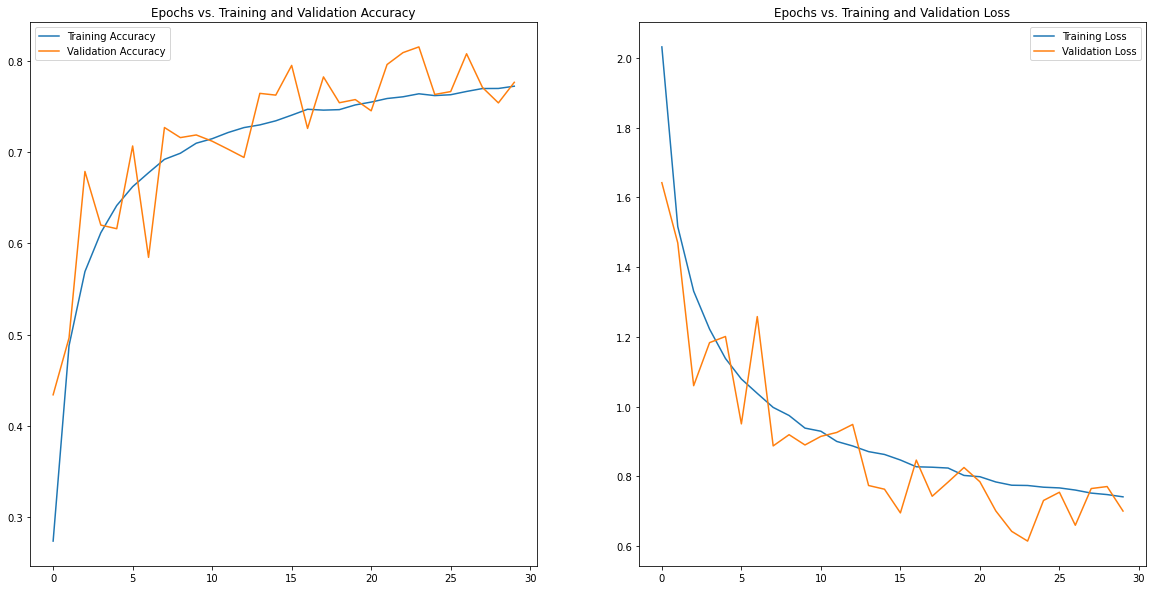

In [157]:
# Visualize epochs vs. train and validation accuracies and losses

plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Epochs vs. Training and Validation Accuracy')
    
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.title('Epochs vs. Training and Validation Loss')

plt.show()

From the above we can see how accuracy and loss vary with epochs

# **(6)Print the classification accuracy metrics**

In [158]:
results_on_test

,Model_with,Loss,Accuracy
1,SGD,1.731914,0.426000
2,SGD+Weight_Initialization,1.284746,0.615667
3,ADAM +weight_initialisation,0.832287,0.744944
4,ADAM + Batch_Normalization,0.689900,0.792833
5,ADAM+Batch_Normalization+Weight_Initialization...,0.798797,0.750000
6,ADAM+Batch_Normalization+Weight_Init+Dropout+L...,0.759072,0.759056


## **Observation**:
(1)From the above we can see that Model which use optimizer as ADAM and Batch_Normalization give more accuracy.

(2)Model with ADAM+Batch_Normalization+Weight_Init+Dropout+Larger_Epoch give loss and good accuracy.Also it remove overfit problem

Now lets try to see the classification report and try to obtain confusion matrix

In [0]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
import seaborn as sns

In [147]:
y_pred = model_4.predict(test_X)
print(y_pred)

[[2.0113792e-01 4.9094390e-02 2.4875148e-01 ... 1.8194815e-02
  1.3809074e-01 1.9832781e-01]
 [3.1271204e-05 1.7512415e-04 2.5077770e-03 ... 9.9092758e-01
  8.6924958e-04 4.4536826e-04]
 [2.4673507e-05 1.1642331e-05 9.9911147e-01 ... 7.8864050e-06
  3.7945088e-04 4.8444163e-05]
 ...
 [5.9334183e-04 9.9734990e-03 7.1744539e-04 ... 9.8671383e-01
  2.4746815e-04 5.1876788e-05]
 [4.3699529e-05 3.2236445e-04 2.7506314e-02 ... 4.9109329e-03
  4.3306589e-02 9.1133261e-01]
 [1.0398752e-03 3.8226984e-02 8.9811993e-01 ... 1.1663434e-02
  2.4670446e-03 8.3589007e-04]]


The above prediction are in term of score so we need to inverse transform to its original form

In [0]:
# One-hot encoding of train and test labels
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
train_labels = lb.fit_transform(y_train1)
test_labels = lb.fit_transform(y_test1)

In [0]:
# Get predictions and apply inverse transformation to the labels

y_pred = model_4.predict(test_X)

y_pred_inverse = lb.inverse_transform(y_pred, lb.classes_)
y_test_inverse = lb.inverse_transform(test_y, lb.classes_)

In [164]:
y_train_inverse

array([2, 6, 7, ..., 7, 0, 4], dtype=uint8)

So from above we have succesfully transform the labels.Now we will plot the confusion matrix

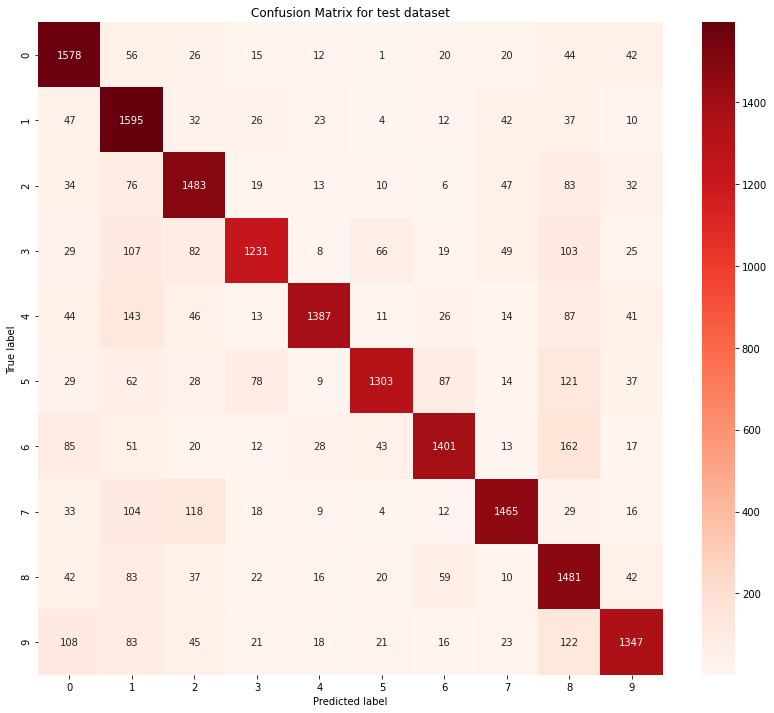

In [165]:
# Plot the confusion matrix

cm_1 = confusion_matrix(y_test_inverse, y_pred_inverse, labels=lb.classes_)

fig, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(cm_1, annot=True, cmap='Reds', fmt='d', ax=ax)
plt.title('Confusion Matrix for test dataset')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [166]:
from sklearn import metrics
print(metrics.classification_report(y_test_inverse, y_pred_inverse, labels=lb.classes_))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82      1814
           1       0.68      0.87      0.76      1828
           2       0.77      0.82      0.80      1803
           3       0.85      0.72      0.78      1719
           4       0.91      0.77      0.83      1812
           5       0.88      0.74      0.80      1768
           6       0.84      0.76      0.80      1832
           7       0.86      0.81      0.84      1808
           8       0.65      0.82      0.73      1812
           9       0.84      0.75      0.79      1804

    accuracy                           0.79     18000
   macro avg       0.81      0.79      0.79     18000
weighted avg       0.81      0.79      0.79     18000



In [0]:
 #confusion_matrix(y_test_inverse,y_pred_inverse)

From the above we can observe that

(1)Recall is higher for 0 and 1 as compared to 3 and so 0 and 1 are better classified than 3

(2)Precesion is higher for 4

# **Conclusion:**

(1)Machine learning is about mapping inputs (such as images) to targets (such as the label “1”), which is done by observing many examples
of input and targets. We can also know that deep neural networks do this input-to-target mapping via a deep sequence of simple datatransformations (layers) and that these data transformations are learned by exposure to examples.

(2)The specification of what a layer does toits input data is stored in the layer’s weights, which in essence are a bunch of numbers. In technical terms, we’d say that the transformation implemented by a layer is parameterized by its weights (Weights are also sometimes called the parametersof a layer.) In this context, learning means finding a set of values for the weights of all layers in a network, such that the network will correctly map example inputs to their associated targets.

(3)The loss function takes the predictions of the network and the true target
(what we wanted the network to output) and computes a distance score, capturing
how well the network has done on this specific example.

(4)The fundamental trick in deep learning is to use this score as a feedback signal to adjust the value of the weights a little, in a direction that will lower the loss score for the example.This adjustment is the job of the optimizer, which implements what’s called the Backpropagationalgorithm: the central algorithm in deep learning.

(5)loss function—It tells how the network will be able to measure its performance on the training data, and thus how it will be able to steer itself in the right direction.

(6)An optimizer—The mechanism through which the network will update itself
based on the data it sees and its loss function.

(7) Model which use optimizer as ADAM and Batch_Normalization give more accuracy than other models.

(8)Model with ADAM+Batch_Normalization+Weight_Init+Dropout+Larger_Epoch give loss and good accuracy.Also it remove overfit problem.
